In [1]:
import pandas as pd
import numpy as np
import nltk

# Import non-BTS lyrics dataset:

In [2]:
# read data files

lyrics_data_full = pd.read_csv('tcc_ceds_music.csv')

In [3]:
#take only: artist name, song title, lyrics, and valence

lyrics_data_select = pd.DataFrame([lyrics_data_full['artist_name'], lyrics_data_full['track_name'], lyrics_data_full['lyrics'], lyrics_data_full['valence'] ])

In [4]:
lyrics_data = lyrics_data_select.transpose()

#### Create two categories for positive and negative sentiment from valence values: 
positive: 1 if valence >= 0.5 <br>
negative: 0 if valence < 0.5

In [6]:
score_column = []

for i in range(len(lyrics_data['valence'])):
    
    if lyrics_data['valence'].iloc[i] < 0.5:
        score = 0
    else:
        score = 1
    
    score_column.append(score)

In [7]:
lyrics_data['score'] = score_column

In [8]:
lyrics_data

,artist_name,track_name,lyrics,valence,score
0,mukesh,mohabbat bhi jhoothi,hold time feel break feel untrue convince spea...,0.339448,0
1,frankie laine,i believe,believe drop rain fall grow believe darkest ni...,0.325021,0
2,johnnie ray,cry,sweetheart send letter goodbye secret feel bet...,0.351814,0
3,pérez prado,patricia,kiss lips want stroll charm mambo chacha merin...,0.77535,1
4,giorgos papadopoulos,apopse eida oneiro,till darling till matter know till dream live ...,0.597073,1
...,...,...,...,...,...
28367,mack 10,10 million ways,cause fuck leave scar tick tock clock come kno...,0.751649,1
28368,m.o.p.,ante up (robbin hoodz theory),minks things chain ring braclets yap fame come...,0.922712,1
28369,nine,whutcha want?,get ban get ban stick crack relax plan attack ...,0.838211,1
28370,will smith,switch,check check yeah yeah hear thing call switch g...,0.50845,1


### Load BTS song lyrics

Original dataset from Kaggle is as shown below. To collect unique non-instrumental songs, data was manually organized. Valence scores for each song were added manually from an external dataset acquired using Spotify API. 

In [9]:
#load BTS song data

bts_train_data = pd.read_csv('bts_train_data_yr.csv')
bts_test_data = pd.read_csv('bts_test_data_yr.csv')

In [10]:
bts_data_temp = pd.concat([bts_train_data, bts_test_data])

In [11]:
bts_data_temp = bts_data_temp.drop(['album_yr'], axis = 1)

In [12]:
bts_data_temp

,track_title,valence,lyrics
0,Intro: 2 Cool 4 Skool (ft. DJ Friz),0.553,we’re now going to progress to some steps\nwhi...
1,We Are Bulletproof Pt.2,0.868,(what) give it to me\n (what) be nervous\n (wh...
2,No More Dream,0.612,"hey, what's your dream?\n hey, what’s your dre..."
3,좋아요 (I Like It),0.768,wanna be loved…\n\ndon’t wanna be fool wanna b...
4,Outro: Circle Room Cypher,0.866,"hurry up, hurry-hurry-hurry-hurry-hurry-hurry-..."
...,...,...,...
15,Blue & Grey,0.364,Where is my angel?\nThe end of the day\nSomeon...
16,Telepathy,0.570,Every time during the same day\nI feel the hap...
17,Dis-ease,0.484,"Mm, uh-oh\nUh, it looks like I lost something\..."
18,Stay,0.341,Was it a dream?\nI think I saw you\nWhen I ope...


In [13]:
bts_valence_score = []

for i in range(len(bts_data_temp['valence'])):
    if bts_data_temp['valence'].iloc[i] > 0.5:
        score = 1
    else:
        score = 0
    
    bts_valence_score.append(score)

In [14]:
bts_data_temp['score'] = bts_valence_score

In [15]:
bts_data_temp['artist_name'] = ['BTS' for x in bts_data_temp['track_title']]

In [16]:
bts_data = bts_data_temp.rename(columns={"track_title": "track_name"})

In [17]:
bts_data

,track_name,valence,lyrics,score,artist_name
0,Intro: 2 Cool 4 Skool (ft. DJ Friz),0.553,we’re now going to progress to some steps\nwhi...,1,BTS
1,We Are Bulletproof Pt.2,0.868,(what) give it to me\n (what) be nervous\n (wh...,1,BTS
2,No More Dream,0.612,"hey, what's your dream?\n hey, what’s your dre...",1,BTS
3,좋아요 (I Like It),0.768,wanna be loved…\n\ndon’t wanna be fool wanna b...,1,BTS
4,Outro: Circle Room Cypher,0.866,"hurry up, hurry-hurry-hurry-hurry-hurry-hurry-...",1,BTS
...,...,...,...,...,...
15,Blue & Grey,0.364,Where is my angel?\nThe end of the day\nSomeon...,0,BTS
16,Telepathy,0.570,Every time during the same day\nI feel the hap...,1,BTS
17,Dis-ease,0.484,"Mm, uh-oh\nUh, it looks like I lost something\...",0,BTS
18,Stay,0.341,Was it a dream?\nI think I saw you\nWhen I ope...,0,BTS


#### Adding BTS dataset to non-BTS dataset for computation of features:

In [19]:
full_lyrics_data = pd.concat([lyrics_data, bts_data])

In [20]:
full_lyrics_data = full_lyrics_data.reset_index()

In [21]:
full_lyrics_data = full_lyrics_data.drop(['index'], axis=1)

In [22]:
full_lyrics_data

,artist_name,track_name,lyrics,valence,score
0,mukesh,mohabbat bhi jhoothi,hold time feel break feel untrue convince spea...,0.339448,0
1,frankie laine,i believe,believe drop rain fall grow believe darkest ni...,0.325021,0
2,johnnie ray,cry,sweetheart send letter goodbye secret feel bet...,0.351814,0
3,pérez prado,patricia,kiss lips want stroll charm mambo chacha merin...,0.77535,1
4,giorgos papadopoulos,apopse eida oneiro,till darling till matter know till dream live ...,0.597073,1
...,...,...,...,...,...
28498,BTS,Blue & Grey,Where is my angel?\nThe end of the day\nSomeon...,0.364,0
28499,BTS,Telepathy,Every time during the same day\nI feel the hap...,0.57,1
28500,BTS,Dis-ease,"Mm, uh-oh\nUh, it looks like I lost something\...",0.484,0
28501,BTS,Stay,Was it a dream?\nI think I saw you\nWhen I ope...,0.341,0


---

## Preprocess text:

In [23]:
lowercase_lyrics = []

for lyrics in full_lyrics_data['lyrics']:
    text = lyrics
    text = text.lower()
    lowercase_lyrics.append(text)

In [24]:
full_lyrics_data['lowercase'] = lowercase_lyrics

In [25]:
from nltk.tokenize import word_tokenize

In [26]:
full_lyrics_data['lyrics_tokenized'] = full_lyrics_data['lowercase'].apply(word_tokenize)

In [27]:
full_lyrics_data

,artist_name,track_name,lyrics,valence,score,lowercase,lyrics_tokenized
0,mukesh,mohabbat bhi jhoothi,hold time feel break feel untrue convince spea...,0.339448,0,hold time feel break feel untrue convince spea...,"[hold, time, feel, break, feel, untrue, convin..."
1,frankie laine,i believe,believe drop rain fall grow believe darkest ni...,0.325021,0,believe drop rain fall grow believe darkest ni...,"[believe, drop, rain, fall, grow, believe, dar..."
2,johnnie ray,cry,sweetheart send letter goodbye secret feel bet...,0.351814,0,sweetheart send letter goodbye secret feel bet...,"[sweetheart, send, letter, goodbye, secret, fe..."
3,pérez prado,patricia,kiss lips want stroll charm mambo chacha merin...,0.77535,1,kiss lips want stroll charm mambo chacha merin...,"[kiss, lips, want, stroll, charm, mambo, chach..."
4,giorgos papadopoulos,apopse eida oneiro,till darling till matter know till dream live ...,0.597073,1,till darling till matter know till dream live ...,"[till, darling, till, matter, know, till, drea..."
...,...,...,...,...,...,...,...
28498,BTS,Blue & Grey,Where is my angel?\nThe end of the day\nSomeon...,0.364,0,where is my angel?\nthe end of the day\nsomeon...,"[where, is, my, angel, ?, the, end, of, the, d..."
28499,BTS,Telepathy,Every time during the same day\nI feel the hap...,0.57,1,every time during the same day\ni feel the hap...,"[every, time, during, the, same, day, i, feel,..."
28500,BTS,Dis-ease,"Mm, uh-oh\nUh, it looks like I lost something\...",0.484,0,"mm, uh-oh\nuh, it looks like i lost something\...","[mm, ,, uh-oh, uh, ,, it, looks, like, i, lost..."
28501,BTS,Stay,Was it a dream?\nI think I saw you\nWhen I ope...,0.341,0,was it a dream?\ni think i saw you\nwhen i ope...,"[was, it, a, dream, ?, i, think, i, saw, you, ..."


In [28]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [29]:
def remove_punctuation_marks(tokens):
    clean_tokens = []
    for tok in tokens:
        if tok.isalpha():
            clean_tokens.append(tok)
    return clean_tokens

In [30]:
full_lyrics_data['lyrics_clean_tokenized'] = full_lyrics_data['lyrics_tokenized'].apply(remove_punctuation_marks)

In [31]:
full_lyrics_data

,artist_name,track_name,lyrics,valence,score,lowercase,lyrics_tokenized,lyrics_clean_tokenized
0,mukesh,mohabbat bhi jhoothi,hold time feel break feel untrue convince spea...,0.339448,0,hold time feel break feel untrue convince spea...,"[hold, time, feel, break, feel, untrue, convin...","[hold, time, feel, break, feel, untrue, convin..."
1,frankie laine,i believe,believe drop rain fall grow believe darkest ni...,0.325021,0,believe drop rain fall grow believe darkest ni...,"[believe, drop, rain, fall, grow, believe, dar...","[believe, drop, rain, fall, grow, believe, dar..."
2,johnnie ray,cry,sweetheart send letter goodbye secret feel bet...,0.351814,0,sweetheart send letter goodbye secret feel bet...,"[sweetheart, send, letter, goodbye, secret, fe...","[sweetheart, send, letter, goodbye, secret, fe..."
3,pérez prado,patricia,kiss lips want stroll charm mambo chacha merin...,0.77535,1,kiss lips want stroll charm mambo chacha merin...,"[kiss, lips, want, stroll, charm, mambo, chach...","[kiss, lips, want, stroll, charm, mambo, chach..."
4,giorgos papadopoulos,apopse eida oneiro,till darling till matter know till dream live ...,0.597073,1,till darling till matter know till dream live ...,"[till, darling, till, matter, know, till, drea...","[till, darling, till, matter, know, till, drea..."
...,...,...,...,...,...,...,...,...
28498,BTS,Blue & Grey,Where is my angel?\nThe end of the day\nSomeon...,0.364,0,where is my angel?\nthe end of the day\nsomeon...,"[where, is, my, angel, ?, the, end, of, the, d...","[where, is, my, angel, the, end, of, the, day,..."
28499,BTS,Telepathy,Every time during the same day\nI feel the hap...,0.57,1,every time during the same day\ni feel the hap...,"[every, time, during, the, same, day, i, feel,...","[every, time, during, the, same, day, i, feel,..."
28500,BTS,Dis-ease,"Mm, uh-oh\nUh, it looks like I lost something\...",0.484,0,"mm, uh-oh\nuh, it looks like i lost something\...","[mm, ,, uh-oh, uh, ,, it, looks, like, i, lost...","[mm, uh, it, looks, like, i, lost, something, ..."
28501,BTS,Stay,Was it a dream?\nI think I saw you\nWhen I ope...,0.341,0,was it a dream?\ni think i saw you\nwhen i ope...,"[was, it, a, dream, ?, i, think, i, saw, you, ...","[was, it, a, dream, i, think, i, saw, you, whe..."


In [32]:
from nltk.stem import WordNetLemmatizer

In [33]:
lemmatizer = WordNetLemmatizer()

full_lyrics_data['lyrics_lemmatized'] = full_lyrics_data['lyrics_clean_tokenized'].apply(lambda x: [lemmatizer.lemmatize(lyric) for lyric in x])

In [34]:
full_lyrics_data

,artist_name,track_name,lyrics,valence,score,lowercase,lyrics_tokenized,lyrics_clean_tokenized,lyrics_lemmatized
0,mukesh,mohabbat bhi jhoothi,hold time feel break feel untrue convince spea...,0.339448,0,hold time feel break feel untrue convince spea...,"[hold, time, feel, break, feel, untrue, convin...","[hold, time, feel, break, feel, untrue, convin...","[hold, time, feel, break, feel, untrue, convin..."
1,frankie laine,i believe,believe drop rain fall grow believe darkest ni...,0.325021,0,believe drop rain fall grow believe darkest ni...,"[believe, drop, rain, fall, grow, believe, dar...","[believe, drop, rain, fall, grow, believe, dar...","[believe, drop, rain, fall, grow, believe, dar..."
2,johnnie ray,cry,sweetheart send letter goodbye secret feel bet...,0.351814,0,sweetheart send letter goodbye secret feel bet...,"[sweetheart, send, letter, goodbye, secret, fe...","[sweetheart, send, letter, goodbye, secret, fe...","[sweetheart, send, letter, goodbye, secret, fe..."
3,pérez prado,patricia,kiss lips want stroll charm mambo chacha merin...,0.77535,1,kiss lips want stroll charm mambo chacha merin...,"[kiss, lips, want, stroll, charm, mambo, chach...","[kiss, lips, want, stroll, charm, mambo, chach...","[kiss, lip, want, stroll, charm, mambo, chacha..."
4,giorgos papadopoulos,apopse eida oneiro,till darling till matter know till dream live ...,0.597073,1,till darling till matter know till dream live ...,"[till, darling, till, matter, know, till, drea...","[till, darling, till, matter, know, till, drea...","[till, darling, till, matter, know, till, drea..."
...,...,...,...,...,...,...,...,...,...
28498,BTS,Blue & Grey,Where is my angel?\nThe end of the day\nSomeon...,0.364,0,where is my angel?\nthe end of the day\nsomeon...,"[where, is, my, angel, ?, the, end, of, the, d...","[where, is, my, angel, the, end, of, the, day,...","[where, is, my, angel, the, end, of, the, day,..."
28499,BTS,Telepathy,Every time during the same day\nI feel the hap...,0.57,1,every time during the same day\ni feel the hap...,"[every, time, during, the, same, day, i, feel,...","[every, time, during, the, same, day, i, feel,...","[every, time, during, the, same, day, i, feel,..."
28500,BTS,Dis-ease,"Mm, uh-oh\nUh, it looks like I lost something\...",0.484,0,"mm, uh-oh\nuh, it looks like i lost something\...","[mm, ,, uh-oh, uh, ,, it, looks, like, i, lost...","[mm, uh, it, looks, like, i, lost, something, ...","[mm, uh, it, look, like, i, lost, something, i..."
28501,BTS,Stay,Was it a dream?\nI think I saw you\nWhen I ope...,0.341,0,was it a dream?\ni think i saw you\nwhen i ope...,"[was, it, a, dream, ?, i, think, i, saw, you, ...","[was, it, a, dream, i, think, i, saw, you, whe...","[wa, it, a, dream, i, think, i, saw, you, when..."


In [35]:
#POS tagging
tagged_tokens=[]
for token in full_lyrics_data['lyrics_lemmatized'].to_list():
    tagged_tokens.append(nltk.pos_tag(token))

In [38]:
#collect only nouns, verbs, and adjectives
tag_list = []
for song in tagged_tokens:
    tag_list.append([(word,tag) for word, tag in song if tag.startswith('NN') or tag.startswith('VB') or tag.startswith('JJ')])

In [39]:
word_list = []
for song in tag_list:
    word_list.append([word for word, tag in song])

In [40]:
full_lyrics_data['lyrics_processed'] = [' '.join(song) for song in word_list]

In [41]:
full_lyrics_data

,artist_name,track_name,lyrics,valence,score,lowercase,lyrics_tokenized,lyrics_clean_tokenized,lyrics_lemmatized,lyrics_processed
0,mukesh,mohabbat bhi jhoothi,hold time feel break feel untrue convince spea...,0.339448,0,hold time feel break feel untrue convince spea...,"[hold, time, feel, break, feel, untrue, convin...","[hold, time, feel, break, feel, untrue, convin...","[hold, time, feel, break, feel, untrue, convin...",hold time feel break feel untrue convince spea...
1,frankie laine,i believe,believe drop rain fall grow believe darkest ni...,0.325021,0,believe drop rain fall grow believe darkest ni...,"[believe, drop, rain, fall, grow, believe, dar...","[believe, drop, rain, fall, grow, believe, dar...","[believe, drop, rain, fall, grow, believe, dar...",drop rain fall grow believe darkest night cand...
2,johnnie ray,cry,sweetheart send letter goodbye secret feel bet...,0.351814,0,sweetheart send letter goodbye secret feel bet...,"[sweetheart, send, letter, goodbye, secret, fe...","[sweetheart, send, letter, goodbye, secret, fe...","[sweetheart, send, letter, goodbye, secret, fe...",sweetheart send letter goodbye secret feel wak...
3,pérez prado,patricia,kiss lips want stroll charm mambo chacha merin...,0.77535,1,kiss lips want stroll charm mambo chacha merin...,"[kiss, lips, want, stroll, charm, mambo, chach...","[kiss, lips, want, stroll, charm, mambo, chach...","[kiss, lip, want, stroll, charm, mambo, chacha...",kiss lip want stroll charm mambo chacha mering...
4,giorgos papadopoulos,apopse eida oneiro,till darling till matter know till dream live ...,0.597073,1,till darling till matter know till dream live ...,"[till, darling, till, matter, know, till, drea...","[till, darling, till, matter, know, till, drea...","[till, darling, till, matter, know, till, drea...",till darling till matter know live know heart ...
...,...,...,...,...,...,...,...,...,...,...
28498,BTS,Blue & Grey,Where is my angel?\nThe end of the day\nSomeon...,0.364,0,where is my angel?\nthe end of the day\nsomeon...,"[where, is, my, angel, ?, the, end, of, the, d...","[where, is, my, angel, the, end, of, the, day,...","[where, is, my, angel, the, end, of, the, day,...",is end day someone come save please weary sigh...
28499,BTS,Telepathy,Every time during the same day\nI feel the hap...,0.57,1,every time during the same day\ni feel the hap...,"[every, time, during, the, same, day, i, feel,...","[every, time, during, the, same, day, i, feel,...","[every, time, during, the, same, day, i, feel,...",time same day i feel happiest i meet time diff...
28500,BTS,Dis-ease,"Mm, uh-oh\nUh, it looks like I lost something\...",0.484,0,"mm, uh-oh\nuh, it looks like i lost something\...","[mm, ,, uh-oh, uh, ,, it, looks, like, i, lost...","[mm, uh, it, looks, like, i, lost, something, ...","[mm, uh, it, look, like, i, lost, something, i...",mm uh look i lost something i relieve anxiety ...
28501,BTS,Stay,Was it a dream?\nI think I saw you\nWhen I ope...,0.341,0,was it a dream?\ni think i saw you\nwhen i ope...,"[was, it, a, dream, ?, i, think, i, saw, you, ...","[was, it, a, dream, i, think, i, saw, you, whe...","[wa, it, a, dream, i, think, i, saw, you, when...",wa dream i think i saw i open eye room empty h...


In [42]:
from nltk.corpus import stopwords

#nltk.download('stopwords')
stop = set(stopwords.words('english'))

In [43]:
import re

def process(text):
    text = text.lower()
    # only preserve words that have three or more characters
    text_filt = re.findall(r'\b[a-zA-Z]{3,}\b' , text)
    
    #bts_words = {'get', 'make', 'keep','gon', 'hey', 'ayy', 'yeah', 'wan', 'girl', 'baby', 'let', 'say', 'bang', 'ugh', 'want', 'need', 'know', 'come', 'owoah', 'whoa', 'woo', 'ooh'}
    
    words_filt = [w for w in text_filt if w not in stop]
    #words_filt = [w for w in words_filtp if w not in bts_words]
    return words_filt

In [44]:
full_lyrics_data['dictionary'] = full_lyrics_data['lyrics_processed'].apply(process)

In [45]:
full_lyrics_data.dictionary

0        [hold, time, feel, break, feel, untrue, convin...
1        [drop, rain, fall, grow, believe, darkest, nig...
2        [sweetheart, send, letter, goodbye, secret, fe...
3        [kiss, lip, want, stroll, charm, mambo, chacha...
4        [till, darling, till, matter, know, live, know...
                               ...                        
28498    [end, day, someone, come, save, please, weary,...
28499    [time, day, feel, happiest, meet, time, differ...
28500    [look, lost, something, relieve, anxiety, sip,...
28501    [dream, think, saw, open, eye, room, empty, ho...
28502    [thought, young, heart, drum, beating, louder,...
Name: dictionary, Length: 28503, dtype: object

---

## Computing features: Word Frequency

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
count_vect = CountVectorizer()
lyrics_freq_counts = count_vect.fit_transform(full_lyrics_data['lyrics_processed'])

In [48]:
data_features = count_vect.get_feature_names()

In [49]:
data_features

['aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaaah',
 'aaaaaaaaaaaaass',
 'aaaaaaaaaaah',
 'aaaaaaaaaah',
 'aaaaaaaaah',
 'aaaaaaaah',
 'aaaaaaahh',
 'aaaaaaasasarock',
 'aaaaaaaway',
 'aaaaaahhhh',
 'aaaaaahhhhhh',
 'aaaaaalcohol',
 'aaaaah',
 'aaaaahaaaaa',
 'aaaaasmash',
 'aaaah',
 'aaaahh',
 'aaaahhhhaaahhhh',
 'aaaahhhhhhh',
 'aaaahiight',
 'aaaaphrodisiac',
 'aaaargh',
 'aaaayo',
 'aaafrica',
 'aaagh',
 'aaah',
 'aaahaha',
 'aaahh',
 'aaahhaaaaaa',
 'aaahhh',
 'aaahhhh',
 'aaahhhhh',
 'aaahum',
 'aaalmost',
 'aaand',
 'aaaphrodisiac',
 'aaay',
 'aaayyyy',
 'aaba',
 'aability',
 'aact',
 'aahaahaah',
 'aahaahaahaah',
 'aahah',
 'aahahaahaaha',
 'aahahah',
 'aahaightaight',
 'aahh',
 'aahhh',
 'aahhhhhh',
 'aalice',
 'aaliyah',
 'aall',
 'aamen',
 'aand',
 'aang',
 'aangel',
 'aaow',
 'aare',
 'aarp',
 'aase',
 'aavenged',
 'aayyyyy',
 'aba',
 'ababa',
 'ababba',
 'ababy',
 'abacab',
 'aback',
 'abacus',
 'abaline',
 'abanaba',
 'abandon',
 'aba

### Train Multinomial Naive Bayes classifier:

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [51]:
other_lyrics_freq = lyrics_freq_counts[0:28372]
other_lyrics_score = full_lyrics_data['score'][0:28372]

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(other_lyrics_freq, other_lyrics_score, test_size=0.25)

In [53]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

In [54]:
Y_lf_pred = mnb.predict(X_test)

In [55]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report
#f1_score(Y_lf_test, Y_lf_pred, average='binary')

classification_report_freq = classification_report(Y_test, Y_lf_pred)

print('\n Accuracy: ', accuracy_score(Y_test, Y_lf_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report_freq)


 Accuracy:  0.6066544480473707

Classification Report

               precision    recall  f1-score   support

           0       0.55      0.73      0.63      3209
           1       0.69      0.51      0.59      3884

    accuracy                           0.61      7093
   macro avg       0.62      0.62      0.61      7093
weighted avg       0.63      0.61      0.60      7093



In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
matrix_train = confusion_matrix(Y_test,Y_lf_pred, labels=[1,0])
print('Confusion matrix : \n',matrix_train)

Confusion matrix : 
 [[1976 1908]
 [ 882 2327]]


In [58]:
import seaborn as sn
import matplotlib.pyplot as plt

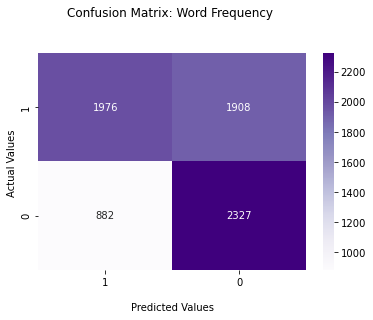

In [59]:
ax = sn.heatmap(matrix_train, annot=True, cmap='Purples', fmt='g')

ax.set_title('Confusion Matrix: Word Frequency \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','0'])
ax.yaxis.set_ticklabels(['1','0'])

## Display the visualization of the Confusion Matrix.
plt.show()

---

## Computing features: TF-IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfidf_vect = TfidfVectorizer()

lyrics_tfidf_counts = tfidf_vect.fit_transform(full_lyrics_data.lyrics_processed)

## Train Multinomial Naive Bayes classifier:

In [65]:
X_tfidf_train, X_tfdif_test, Y_tfidf_train, Y_tfidf_test = train_test_split(other_lyrics_freq, other_lyrics_score, test_size=0.25)

In [66]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_tfidf_train,Y_tfidf_train)

MultinomialNB()

In [67]:
Y_tfidf_pred = mnb_tfidf.predict(X_tfdif_test)

In [68]:
classification_report_tfidf = classification_report(Y_tfidf_test, Y_tfidf_pred)

print('\n Accuracy: ', accuracy_score(Y_tfidf_test, Y_tfidf_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report_tfidf)


 Accuracy:  0.6134216833497814

Classification Report

               precision    recall  f1-score   support

           0       0.55      0.72      0.63      3190
           1       0.70      0.52      0.60      3903

    accuracy                           0.61      7093
   macro avg       0.63      0.62      0.61      7093
weighted avg       0.63      0.61      0.61      7093



In [69]:
matrix_tfidf = confusion_matrix(Y_tfidf_test,Y_tfidf_pred, labels=[1,0])

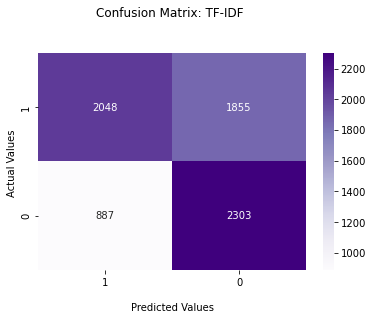

In [70]:
ax = sn.heatmap(matrix_tfidf, annot=True, cmap='Purples', fmt='g')

ax.set_title('Confusion Matrix: TF-IDF \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','0'])
ax.yaxis.set_ticklabels(['1','0'])

## Display the visualization of the Confusion Matrix.
plt.show()

---

# Testing with BTS dataset

### TF-IDF:

In [71]:
bts_tfidf_test = lyrics_tfidf_counts[28372:28504]
bts_score_actual = full_lyrics_data['score'][28372:28504]

In [72]:
bts_tfidf_pred = mnb_tfidf.predict(bts_tfidf_test)

In [73]:
classification_report_bts = classification_report(bts_score_actual, bts_tfidf_pred)

print('\n Accuracy: ', accuracy_score(bts_score_actual, bts_tfidf_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report_bts)


 Accuracy:  0.5648854961832062

Classification Report

               precision    recall  f1-score   support

           0       0.50      1.00      0.66        56
           1       1.00      0.24      0.39        75

    accuracy                           0.56       131
   macro avg       0.75      0.62      0.52       131
weighted avg       0.78      0.56      0.50       131



In [74]:
matrix_tfidf = confusion_matrix(bts_score_actual,bts_tfidf_pred, labels=[1,0])
print('Confusion matrix : \n',matrix_tfidf)

Confusion matrix : 
 [[18 57]
 [ 0 56]]


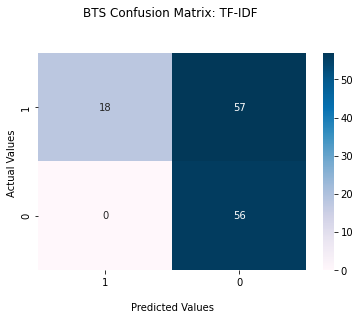

In [75]:
ax = sn.heatmap(matrix_tfidf, annot=True, cmap='PuBu', fmt='g')

ax.set_title('BTS Confusion Matrix: TF-IDF \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','0'])
ax.yaxis.set_ticklabels(['1','0'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Word frequency:

In [76]:
bts_lf_test = lyrics_freq_counts[28372:28504]

In [77]:
bts_pred_freq = mnb.predict(bts_lf_test)

In [78]:
classification_report_bts_freq = classification_report(bts_score_actual, bts_pred_freq)

print('\n Accuracy: ', accuracy_score(bts_score_actual, bts_pred_freq))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report_bts_freq)


 Accuracy:  0.5419847328244275

Classification Report

               precision    recall  f1-score   support

           0       0.48      0.98      0.65        56
           1       0.94      0.21      0.35        75

    accuracy                           0.54       131
   macro avg       0.71      0.60      0.50       131
weighted avg       0.75      0.54      0.48       131



In [79]:
matrix_freq = confusion_matrix(bts_score_actual,bts_pred_freq, labels=[1,0])
print('Confusion matrix : \n',matrix_freq)

Confusion matrix : 
 [[16 59]
 [ 1 55]]


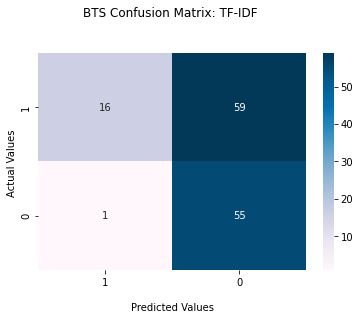

In [80]:
ax = sn.heatmap(matrix_freq, annot=True, cmap='PuBu', fmt='g')

ax.set_title('BTS Confusion Matrix: TF-IDF \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['1','0'])
ax.yaxis.set_ticklabels(['1','0'])

## Display the visualization of the Confusion Matrix.
plt.show()